# 知能システム開発特論

学籍番号：2312018014

氏名：芹澤龍生

研究室：藤田研究室

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO

## Q2

Given Table 19.3, construct a decision tree using a purity threshold of 100%. Use information gain as the split point evaluation measure. Next, classify the point (Age=27, Car=Vintage).

In [2]:
df2 = pd.read_csv("../data/dataForQ1.csv")
df2

,Age,Car,Risk
0,25,sports,L
1,20,vintage,H
2,25,sports,L
3,45,suv,H
4,20,sports,H
5,25,suv,H


In [3]:
LE = LabelEncoder()

labels = ["Car", "Risk"]

for label in labels:
    df2[label] = LE.fit_transform(df2[label])
df2

,Age,Car,Risk
0,25,0,1
1,20,2,0
2,25,0,1
3,45,1,0
4,20,0,0
5,25,1,0


In [4]:
x2 = np.array(df2[['Age', 'Car']])
y2 = np.array(df2['Risk'])

In [5]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2 = clf2.fit(x2, y2)

In [6]:
pred2 = clf2.predict([[27, 2]])
pred2

array([0])

new point:(Age=27,Car=Vintage)

Risk: H

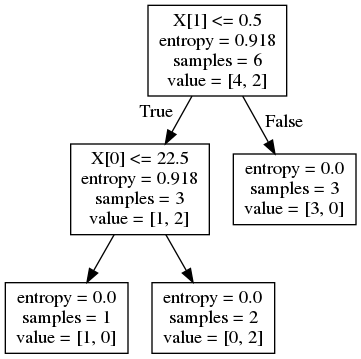

In [7]:
dot_data = StringIO()
tree.export_graphviz(clf2, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Q4

Given the dataset in Table 19.4. Answer the following questions: 

(a) Show which decision will be chosen at the root of the decision tree using information gain [Eq. (19.5)], Gini index [Eq. (19.6)], and CART [Eq. (19.7)] measures. Show all points for all attributes.

(b) What happens to the purity if we use Instance as another attribute? Do you think this attribute should be uesd for a decision in the tree?

In [8]:
df4 = pd.read_csv("../data/dataForQ2.csv")
df4

,a1,a2,a3,Class
0,T,T,5.0,Y
1,T,T,7.0,Y
2,T,F,8.0,N
3,F,F,3.0,Y
4,F,T,7.0,N
5,F,T,4.0,N
6,F,F,5.0,N
7,T,F,6.0,Y
8,F,T,1.0,N


In [9]:
labels = ["a1", "a2", "Class"]

for label in labels:
    df4[label] = LE.fit_transform(df4[label])
df4

,a1,a2,a3,Class
0,1,1,5.0,1
1,1,1,7.0,1
2,1,0,8.0,0
3,0,0,3.0,1
4,0,1,7.0,0
5,0,1,4.0,0
6,0,0,5.0,0
7,1,0,6.0,1
8,0,1,1.0,0


In [11]:
x4 = np.array(df4[['a1', 'a2', 'a3']])
y4 = np.array(df4['Class'])

In [14]:
clf4 = tree.DecisionTreeClassifier(criterion='entropy')
clf4 = clf4.fit(x4, y4)

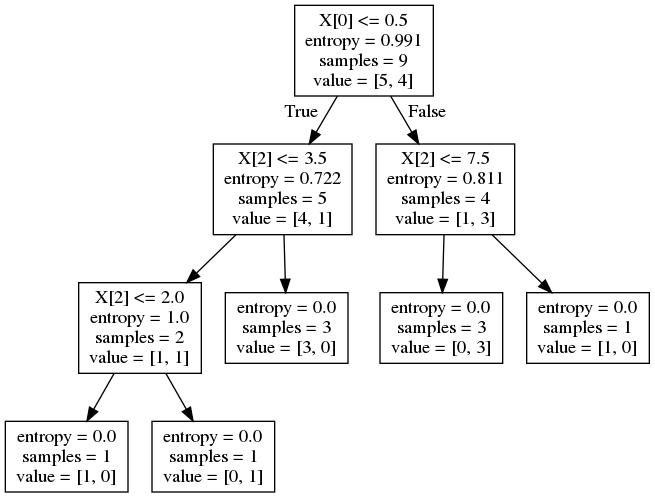

In [15]:
dot_data = StringIO()
tree.export_graphviz(clf4, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [16]:
clf4 = tree.DecisionTreeClassifier(criterion='gini')
clf4 = clf4.fit(x4, y4)

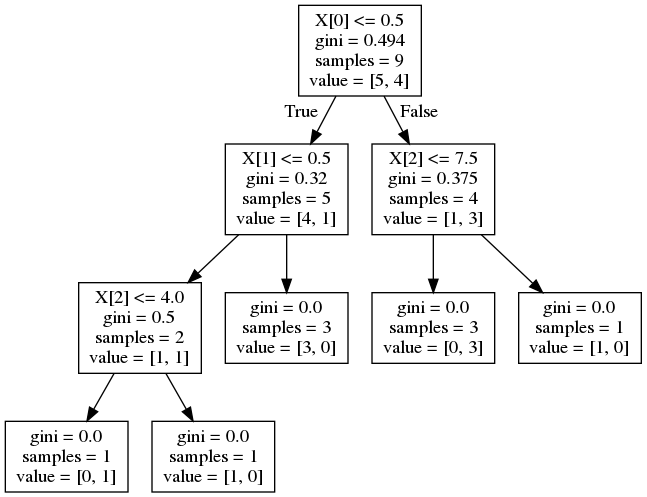

In [17]:
dot_data = StringIO()
tree.export_graphviz(clf4, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

属性が変わることで、ツリーの決定順序が変わる。それによって分類先決定の優先度が変わるため、分類のされ方に変化が生じる。